In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By 
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.firefox.options import Options

from selenium.common.exceptions import NoSuchElementException
from IPython.display import display, Image
import time

Username displayed in the top right corner: Zhe Ying
Login successful.


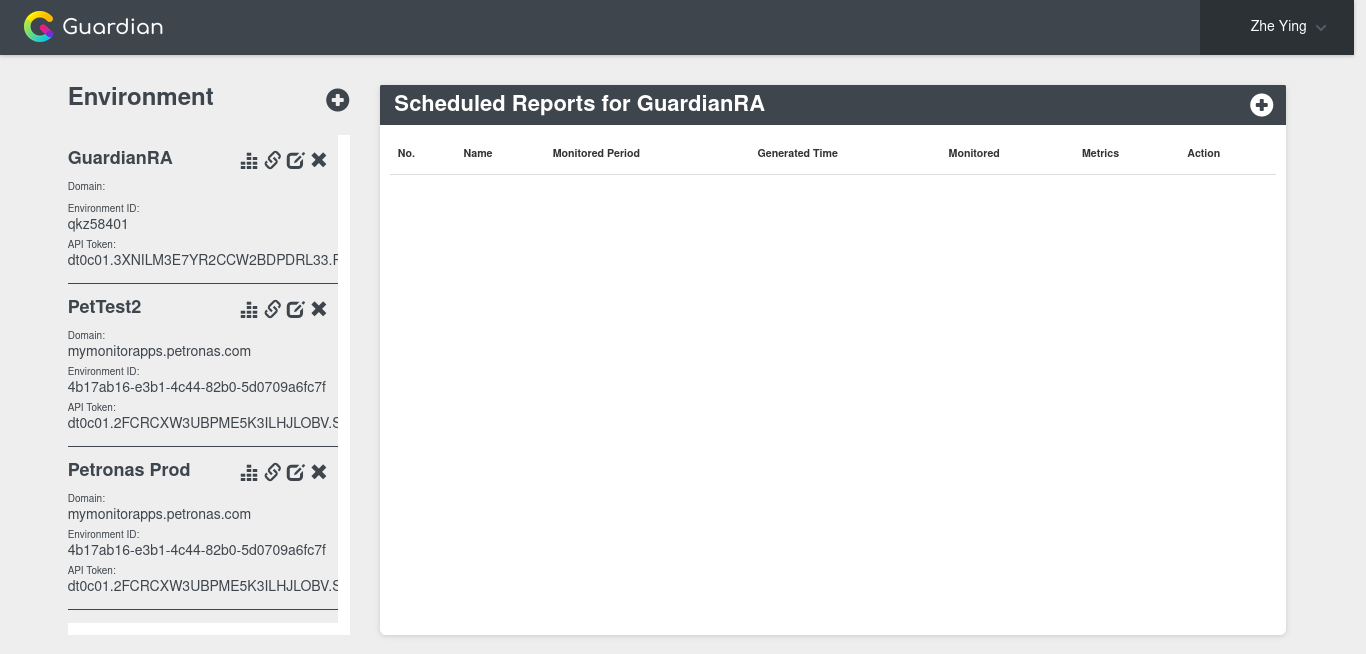

In [2]:
options = Options()
options.add_argument("--headless")
service = Service('/home/zheying/geckodriver')

driver = webdriver.Firefox(options=options, service=service)

variables = {
    'login_URL': 'http://192.168.88.159/gReportingZY/reporting_login.php',
    'username': 'zheying@coreconsulting.asia',
    'password': 'zheying123'
}

def main():
    login(variables['username'], variables['password'])
    validate()
    driver.save_screenshot('ss.png')
    display(Image('ss.png'))
    driver.quit()
    
def click_element(element_id,):
    element = driver.find_element(By.ID, element_id).click()

def fill_input_field(element_id, value):
    element = driver.find_element(By.ID, element_id).send_keys(value)

def login(username, password):
    driver.get(variables['login_URL'])
    fill_input_field('loginEmail', username)
    fill_input_field('loginPassword', password)
    click_element('loginSubmit')
    time.sleep(5)
    
def validate():
    try:
        top_nav_element = driver.find_element(By.CLASS_NAME, 'cd-top-nav')
        username_text = top_nav_element.text.strip()
        if username_text:
            print("Username displayed in the top right corner:", username_text)
            print("Login successful.")
        else:
            print("Login failed: Username is empty.")
    except NoSuchElementException:
        print("Login failed: Username not found in the top right corner.")

if __name__ == "__main__":
    main()